<a href="https://colab.research.google.com/github/rgiuffre90/Earthquake-Project/blob/main/Robert_Giuffre_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## BLOG POST: https://medium.com/@rgiuffre90/extraterrestrial-visitors-is-earth-one-big-gas-station-b178a5f20c37

In [ ]:
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 


Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packa

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.patches as mpatches
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point
from scipy import stats
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Importing data sets to be used

In [ ]:
#Dataset 1 - power plant data
power_p = pd.read_csv('https://query.data.world/s/f2c2ooifjulp3w2nu6b2feb4z4y2wn')
power_p.head()

,X,Y,FID,PGM_SYS_AC,PGM_SYS_ID,REGISTRY_I,PRIMARY_NA,LOCATION_A,CITY_NAME,COUNTY_NAM,STATE_CODE,POSTAL_COD,FEDERAL_FA,TRIBAL_LAN,DATA_QUALI,LAST_REPOR,CREATE_DAT,UPDATE_DAT,LATITUDE83,LONGITUDE8,REF_POINT_,DERIVED_HU,DERIVED_WB,DERIVED_CB,DERIVED_CD,OZONE_8HR_,PB_2008_AR,PM25_1997_,PM25_2006_,OZONE_8HR1,UTILITY_ID,UTILITY_NA,PLANT_CODE,PLANT_NAME,GENERATOR_,PRIME_MOVE,STATUS,NAMEPLATE,SUMMER_CAP,WINTER_CAP,...,DELIVER_PO,SYNCHRONIZ,OWNERSHIP,TURBINES,COGENERATO,SECTOR_NAM,SECTOR,TOPPING_BO,DUCT_BURNE,PLANNED_MO,PLANNED_UP,PLANNED__1,PLANNED__2,PLANNED__3,PLANNED_DE,PLANNED__4,PLANNED__5,PLANNED__6,PLANNED_NE,PLANNED_EN,PLANNED_RE,PLANNED__7,OTHER_MODS,OTHER_MOD_,OTHER_MOD1,PLANNED__8,PLANNED__9,SFG_SYSTEM,PULVERIZED,FLUIDIZED_,SUBCRITICA,SUPERCRITI,ULTRASUPER,CARBONCAPT,STARTUP_SO,STARTUP__1,STARTUP__2,STARTUP__3,ENERGY_SRC,ENERGY_S_6
0,-70.805180,43.225680,4001,EIA-860,50702,110028025456,SALMON FALLS,LIBERTY STREET,SOUTH BERWICK,YORK,ME,03908,,,V,,2007-02-08,2010-03-30,43.2257,-70.8052,ENTRANCE POINT OF A FACILITY OR STATION,01060003,010600030507,230310350004022,01,"Portland, ME",,,,,4211,"Consolidated Hydro NH, Inc",50702,Salmon Falls,GEN1,HY,OP,0.4,0.4,0.4,...,Y,Y,S,0,N,IPP Non-CHP,2,,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,,,,,,,,,,,,"Water, Conventional or Pumped Storage",
1,-70.939444,42.521667,4002,EIA-860,50955,110000310431,ROUSSELOT GELATINE,227 WASHINGTON ST.,PEABODY,ESSEX,MA,01960,N,,V,,2000-03-01,2014-04-30,42.5217,-70.9394,,01090001,010900010302,250092106001001,06,"Boston-Lawrence-Worcester (E. Mass), MA",,,,,5623,Rousselot Inc,50955,Rousselot Inc,GEN1,ST,SB,1.5,1.5,1.5,...,Y,Y,W,.,Y,Industrial CHP,7,B,N,N,.,.,.,.,.,.,.,.,,,.,.,N,.,.,.,.,N,,,,,,,PG,,,,Natural Gas,"Residual Fuel Oil (Include No. 5, and No. 6 Fu..."
2,-73.979022,40.668264,4003,EIA-860,52091,110000807789,NEW YORK METHODIST HOSPITAL,506 SIXTH STREET,BROOKLYN,KINGS,NY,11215-0622,N,,V,,2000-03-01,2014-07-22,40.6683,-73.9790,PLANT ENTRANCE (GENERAL),02030201,020301040205,360470153001000,09,"New York-N. New Jersey-Long Island, NY-NJ-CT",,"New York-N. New Jersey-Long Island, NY-NJ-CT","New York, NY-NJ-CT","New York-N. New Jersey-Long Island, NY-NJ-CT",13484,New York Methodist Hospital,52091,New York Methodist Hospital,3A,IC,OP,0.9,0.7,0.9,...,N,,S,.,Y,IPP CHP,3,B,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,Natural Gas,
3,-72.423080,42.156470,4004,EIA-860,52166,110028031332,COLLINS FACILITY,COTTAGE AVE,WILBRAHAM,HAMPDEN,MA,01095,,,V,,2007-02-08,2010-03-30,42.1565,-72.4231,ENTRANCE POINT OF A FACILITY OR STATION,01080204,010802040402,250138136014002,01,"Springfield (W. Mass), MA",,,,,4034,Collins Hydroelectric Partners,52166,Collins Facility,1,HY,OP,0.6,0.6,0.6,...,Y,,S,.,N,IPP Non-CHP,2,,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,"Water, Conventional or Pumped Storage",
4,-70.231837,44.080888,4005,EIA-860,52171,110028023804,BARKER MILL UPPER HYDRO PROJECT,381 MILL ST,AUBURN,ANDROSCOGGIN,ME,04210,,,V,,2007-02-08,2014-04-14,44.0809,-70.2318,ENTRANCE POINT OF A FACILITY OR STATION,01040002,010400020910,230010106001012,02,,,,,,56838,KEI (Maine) Power Management (III) LLC,52171,Upper Barker,GEN1,HY,OP,1.0,1.0,1.0,...,Y,,S,.,N,IPP Non-CHP,2,,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,"Water, Conventional or Pumped Storage",


In [ ]:
#Dataset 2, UFO sighting data

ufo = pd.read_csv('https://query.data.world/s/tiuxxs7m7wwat2rejk5lckf6eeqi72')
ufo.head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN


In [ ]:
#Second UFO Dataset, 2016 Data only
# Set Canada entrys as NaNs to drop them from the dataset
ufo2 = pd.read_excel('https://query.data.world/s/bvanldojkoxxo75f7jphsubcabojs5', na_values = 'CANADA')
ufo2.head()

,Date / Time,Country,City,State,Shape,Summary,lat,lng
0,12/21/16 19:15,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888
1,12/21/16 00:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,12/20/16 22:30,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,12/20/16 19:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,12/19/16 21:53,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290


In [ ]:
#dropping CANADA values from dataset since they have been switched to NaN values
ufo2 = ufo2.dropna()
ufo2

,Date / Time,Country,City,State,Shape,Summary,lat,lng
0,12/21/16 19:15,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888
1,12/21/16 00:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,12/20/16 22:30,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,12/20/16 19:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,12/19/16 21:53,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290
...,...,...,...,...,...,...,...,...
5172,2016-01-01 00:00:00,USA,Elk Grove,CA,Light,6-7 peach-colored craft moving easterly direct...,38.408799,-121.371618
5173,2016-01-01 00:00:00,USA,Anchorage,AK,Circle,New Years yellow objects.,61.216313,-149.894852
5174,2016-01-01 00:00:00,USA,Sodaville,OR,Sphere,Two balls of orange light seen above the trees...,44.483395,-122.869982
5175,2016-01-01 00:00:00,USA,Arnold,MO,Triangle,Triangle obj. moving W to SE from my position....,38.432832,-90.377619


In [ ]:
#Dataset 3 - earthquake data

quake =  pd.read_csv('https://query.data.world/s/sqp7bcxyjvnbncujgulbtxtl3vj3kp')
quake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-09-23T19:29:25.370Z,19.410500,-155.418838,5.95,3.05,ml,59.0,27.0,0.05268,0.24,hv,hv61421661,2016-09-23T19:35:10.600Z,"19km W of Volcano, Hawaii",earthquake,0.27,0.85,0.370,37.0,automatic,hv,hv
1,2016-09-23T19:23:23.000Z,60.215500,-152.573700,103.10,2.00,ml,NaN,NaN,NaN,0.74,ak,ak14022105,2016-09-23T19:34:23.990Z,"31km SSE of Redoubt Volcano, Alaska",earthquake,0.80,1.00,NaN,NaN,automatic,ak,ak
2,2016-09-23T19:04:11.160Z,46.016833,-112.485333,-2.00,2.11,ml,7.0,159.0,0.19600,0.16,mb,mb80174469,2016-09-23T19:28:27.660Z,"4km ENE of Butte, Montana",quarry blast,0.92,31.61,0.199,11.0,reviewed,mb,mb
3,2016-09-23T19:04:06.000Z,60.353400,-140.647200,0.00,1.80,ml,NaN,NaN,NaN,0.83,ak,ak14021665,2016-09-23T19:27:07.750Z,"103km NNW of Yakutat, Alaska",earthquake,0.30,56.40,NaN,NaN,automatic,ak,ak
4,2016-09-23T18:39:38.520Z,19.362499,-155.367004,4.82,1.72,md,9.0,335.0,0.08399,0.26,hv,hv61421606,2016-09-23T18:42:45.350Z,"15km WSW of Volcano, Hawaii",earthquake,2.90,23.94,0.250,7.0,automatic,hv,hv


In [ ]:
# Creating a bounding box of coordinates. This calculates what my map size should be for the map graphs.
BBox = ((ufo2.lng.min(), ufo2.lng.max(),
         ufo2.lat.min(), ufo2.lat.max()))
BBox

(-162.597762, -68.0836489, 19.062767, 66.8982057)

In [ ]:
# creating 2 functions that will clean the coordinates data
# this will make the coordinates fall within the bounding box of the United States
def lng_clean(longitude):
  while -68.083 >= longitude:
    return longitude
  else:
      return np.NaN

In [ ]:
# Similar function as above that is for latitude
def lat_clean(latitude):
  while 67 >= latitude:
    return latitude
  else:
      return np.NaN

In [ ]:
#cleaning the earthquake dataset coordinates as  these included earthquakes outside of the US
quake['longitude'] = quake['longitude'].apply(lng_clean)

In [ ]:
#cleaning earthquake latitude coordinates
quake['latitude'] = quake['latitude'].apply(lat_clean)

In [ ]:
#removing NaN values so the data maps correctly
quake = quake.dropna()

In [ ]:
#verifying data has taken the changes from the functions
quake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-09-23T19:29:25.370Z,19.410500,-155.418838,5.95,3.05,ml,59.0,27.0,0.05268,0.24,hv,hv61421661,2016-09-23T19:35:10.600Z,"19km W of Volcano, Hawaii",earthquake,0.27,0.85,0.370,37.0,automatic,hv,hv
2,2016-09-23T19:04:11.160Z,46.016833,-112.485333,-2.00,2.11,ml,7.0,159.0,0.19600,0.16,mb,mb80174469,2016-09-23T19:28:27.660Z,"4km ENE of Butte, Montana",quarry blast,0.92,31.61,0.199,11.0,reviewed,mb,mb
4,2016-09-23T18:39:38.520Z,19.362499,-155.367004,4.82,1.72,md,9.0,335.0,0.08399,0.26,hv,hv61421606,2016-09-23T18:42:45.350Z,"15km WSW of Volcano, Hawaii",earthquake,2.90,23.94,0.250,7.0,automatic,hv,hv
7,2016-09-23T18:00:23.180Z,33.853167,-117.496500,-0.55,1.40,ml,45.0,74.0,0.05574,0.21,ci,ci37698088,2016-09-23T18:22:03.494Z,"4km SE of Home Gardens, CA",quarry blast,0.35,31.61,0.129,26.0,reviewed,ci,ci
8,2016-09-23T17:31:20.370Z,44.810667,-122.952333,-0.40,1.25,ml,5.0,130.0,0.31710,0.27,uw,uw61212521,2016-09-23T17:46:59.880Z,"3km S of Turner, Oregon",explosion,0.70,31.61,0.281,3.0,reviewed,uw,uw


In [ ]:
# Verifying that the functions cleaned the data
quake['latitude'].max()

49.4691667

In [ ]:
#verifying longitude falls within the max coordinate distances
quake['longitude'].max()

-68.1979

In [ ]:
# Making sure ufo data set was cleaned of Canada data
ufo2['Country'].value_counts()

USA    5027
Name: Country, dtype: int64

In [ ]:
# Data exploration. Determining number of sightings per state, number of power plants per state, number of earthquakes per state

ufo2['State'].value_counts()

CA    546
FL    338
AZ    220
WA    215
NC    211
NY    203
CO    192
PA    189
OR    157
IL    142
OH    141
TX    139
MI    131
NJ    125
GA    117
WI    114
MO    109
VA    108
TN    108
MA    105
MD     98
SC     88
UT     84
IN     77
MN     77
NM     73
ID     69
ME     67
CT     65
NV     61
KY     51
NH     50
KS     47
LA     46
AL     46
MT     45
OK     43
IA     40
AR     40
AK     37
MS     31
RI     29
WV     28
HI     28
SD     20
VT     19
NE     16
DE     16
WY     15
ND     11
Name: State, dtype: int64

In [ ]:
#exploring power plant state totals
power_p['STATE_CODE'].value_counts()

CA    531
NY    274
TX    238
MN    197
IA    177
MI    175
IL    168
PA    159
WI    135
NC    133
FL    127
OH    118
MA    104
VA    102
KS     98
NJ     97
MO     96
GA     89
WA     87
CO     82
OR     78
IN     76
ME     74
NE     74
SC     67
LA     65
AK     63
CT     61
ID     57
AL     55
AR     46
NH     45
MD     44
TN     42
AZ     42
VT     42
KY     41
OK     41
MS     40
NV     32
NM     31
UT     31
ND     28
MT     26
WY     25
HI     25
WV     24
SD     21
DE     17
RI     13
DC      1
Name: STATE_CODE, dtype: int64

In [ ]:
#exploring energy sources

power_p['ENERGY_SRC'].value_counts()

Natural Gas                                                                                                                                              1250
Water, Conventional or Pumped Storage                                                                                                                     781
Disillate Fuel Oil (all Diesel, and No. 1, No. 2, and No. 4 Fuel Oils)                                                                                    686
Wind                                                                                                                                                      384
Landfill Gas                                                                                                                                              269
Bituminous Coal                                                                                                                                           257
Solar (Photovoltaic, Thermal)                       

In [ ]:
#extracting specific state data for top 5 ufo  sighting states
power_p_some_rows = power_p[(power_p.STATE_CODE == 'CA') | (power_p.STATE_CODE == 'FL') | (power_p.STATE_CODE == 'AZ') | (power_p.STATE_CODE == 'WA') | (power_p.STATE_CODE == 'NC')| (power_p.STATE_CODE == 'NY')]

power_p_some_rows

,X,Y,FID,PGM_SYS_AC,PGM_SYS_ID,REGISTRY_I,PRIMARY_NA,LOCATION_A,CITY_NAME,COUNTY_NAM,STATE_CODE,POSTAL_COD,FEDERAL_FA,TRIBAL_LAN,DATA_QUALI,LAST_REPOR,CREATE_DAT,UPDATE_DAT,LATITUDE83,LONGITUDE8,REF_POINT_,DERIVED_HU,DERIVED_WB,DERIVED_CB,DERIVED_CD,OZONE_8HR_,PB_2008_AR,PM25_1997_,PM25_2006_,OZONE_8HR1,UTILITY_ID,UTILITY_NA,PLANT_CODE,PLANT_NAME,GENERATOR_,PRIME_MOVE,STATUS,NAMEPLATE,SUMMER_CAP,WINTER_CAP,...,DELIVER_PO,SYNCHRONIZ,OWNERSHIP,TURBINES,COGENERATO,SECTOR_NAM,SECTOR,TOPPING_BO,DUCT_BURNE,PLANNED_MO,PLANNED_UP,PLANNED__1,PLANNED__2,PLANNED__3,PLANNED_DE,PLANNED__4,PLANNED__5,PLANNED__6,PLANNED_NE,PLANNED_EN,PLANNED_RE,PLANNED__7,OTHER_MODS,OTHER_MOD_,OTHER_MOD1,PLANNED__8,PLANNED__9,SFG_SYSTEM,PULVERIZED,FLUIDIZED_,SUBCRITICA,SUPERCRITI,ULTRASUPER,CARBONCAPT,STARTUP_SO,STARTUP__1,STARTUP__2,STARTUP__3,ENERGY_SRC,ENERGY_S_6
2,-73.979022,40.668264,4003,EIA-860,52091,110000807789,NEW YORK METHODIST HOSPITAL,506 SIXTH STREET,BROOKLYN,KINGS,NY,11215-0622,N,,V,,2000-03-01,2014-07-22,40.6683,-73.9790,PLANT ENTRANCE (GENERAL),02030201,020301040205,360470153001000,09,"New York-N. New Jersey-Long Island, NY-NJ-CT",,"New York-N. New Jersey-Long Island, NY-NJ-CT","New York, NY-NJ-CT","New York-N. New Jersey-Long Island, NY-NJ-CT",13484,New York Methodist Hospital,52091,New York Methodist Hospital,3A,IC,OP,0.9,0.7,0.9,...,N,,S,.,Y,IPP CHP,3,B,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,Natural Gas,
6,-73.817380,43.247397,4007,EIA-860,54580,110028041367,CURTIS PALMER HYDROELECTRIC,15 PINE STREET,CORINTH,SARATOGA,NY,12822-1319,,,V,,2007-02-08,2010-03-30,43.2474,-73.8174,ENTRANCE POINT OF A FACILITY OR STATION,02020003,020200030501,360910604002004,21,"Albany-Schenectady-Troy, NY",,,,,24931,Palmer Hydroelectric,54580,Curtis Palmer Hydroelectric,C1,HY,OP,2.6,2.5,2.5,...,Y,,S,0,N,IPP Non-CHP,2,,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,"Water, Conventional or Pumped Storage",
12,-73.896509,40.780691,4013,EIA-860,55375,110043792401,ASTORIA ENERGY POWER GENERATION FACILITY,17-10 STEINWAY ST,ASTORIA,QUEENS,NY,11105,N,,V,,2011-09-06,2014-04-30,40.7807,-73.8965,,02030201,020301020105,360810107011001,14,"New York-N. New Jersey-Long Island, NY-NJ-CT",,"New York-N. New Jersey-Long Island, NY-NJ-CT","New York, NY-NJ-CT","New York-N. New Jersey-Long Island, NY-NJ-CT",22979,Astoria Energy LLC,55375,Astoria Energy,CT1,CT,OP,170.0,156.0,170.0,...,Y,,S,.,N,IPP Non-CHP,2,,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,Natural Gas,"Disillate Fuel Oil (all Diesel, and No. 1, No...."
26,-74.018100,41.076800,4027,EIA-860,10521,110000323070,WYETH PHARMACEUTICALS,401 NORTH MIDDLETOWN ROAD,PEARL RIVER,ROCKLAND,NY,10965-1215,N,,V,,2000-03-01,2014-07-22,41.0768,-74.0181,,02030103,020301030902,360870126002002,17,"New York-N. New Jersey-Long Island, NY-NJ-CT",,"New York-N. New Jersey-Long Island, NY-NJ-CT","New York, NY-NJ-CT","New York-N. New Jersey-Long Island, NY-NJ-CT",10849,Wyeth-Averst Lederle,10521,Lederle Laboratories,3A,CA,OP,1.5,1.5,1.5,...,Y,,S,.,Y,Industrial CHP,7,T,Y,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,N,,,,,,,,,,,Natural Gas,"Disillate Fuel Oil (all Diesel, and No. 1, No...."
27,-73.665116,43.287336,4028,EIA-860,10530,110028027258,FEEDER DAM HYDRO PLANT,144 FEEDER DAM RD.,SOUTH GLENS FALLS,SARATOGA,NY,12803,,,V,,2007-02-08,2011-08-04,43.2873,-73.6651,ENTRANCE POINT OF A FACILITY OR STATION,02020003,020200030506,360910601023002,21,"Albany-Schenectady-Troy, NY",,,,,5914,Erie Boulevard Hydropower LP,10530,Feeder Dam Hydro Plant,1,HY,OP,1.0,0.9,1.0,...,Y,,S,.,N,IPP Non-CHP,2,,N,N,.,.,.,.,.,.,.,.,,,.,.,,.,.,.,.,,,,,,,,,,,,"Water, Conventional or Pumped Storage",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,-82.630953,27.757900,3989,EIA-860,627,110035420121,BAYBOR

In [ ]:
#dropping NaN values from the compiled data
power_p_some_rows = power_p_some_rows.dropna()

In [ ]:
#creating dataframe of the states vs energy source for plotting
power_ca = pd.crosstab(power_p_some_rows['ENERGY_SRC'], power_p_some_rows['STATE_CODE']).dropna()
power_ca

STATE_CODE,AZ,CA,FL,NC,NY,WA
ENERGY_SRC,,,,,,
,0,0,0,0,2,0
Agriculture Crop Byproducts/Straw/Energy Crops,0,1,2,0,0,0
Bituminous Coal,1,4,12,17,7,0
Black Liquor,0,1,3,2,0,4
"Disillate Fuel Oil (all Diesel, and No. 1, No. 2, and No. 4 Fuel Oils)",2,5,16,41,15,2
Geothermal,0,30,0,0,0,0
Jet Fuel,0,1,0,0,0,0
Kerosene,0,0,0,0,9,0
Landfill Gas,0,37,6,9,20,1


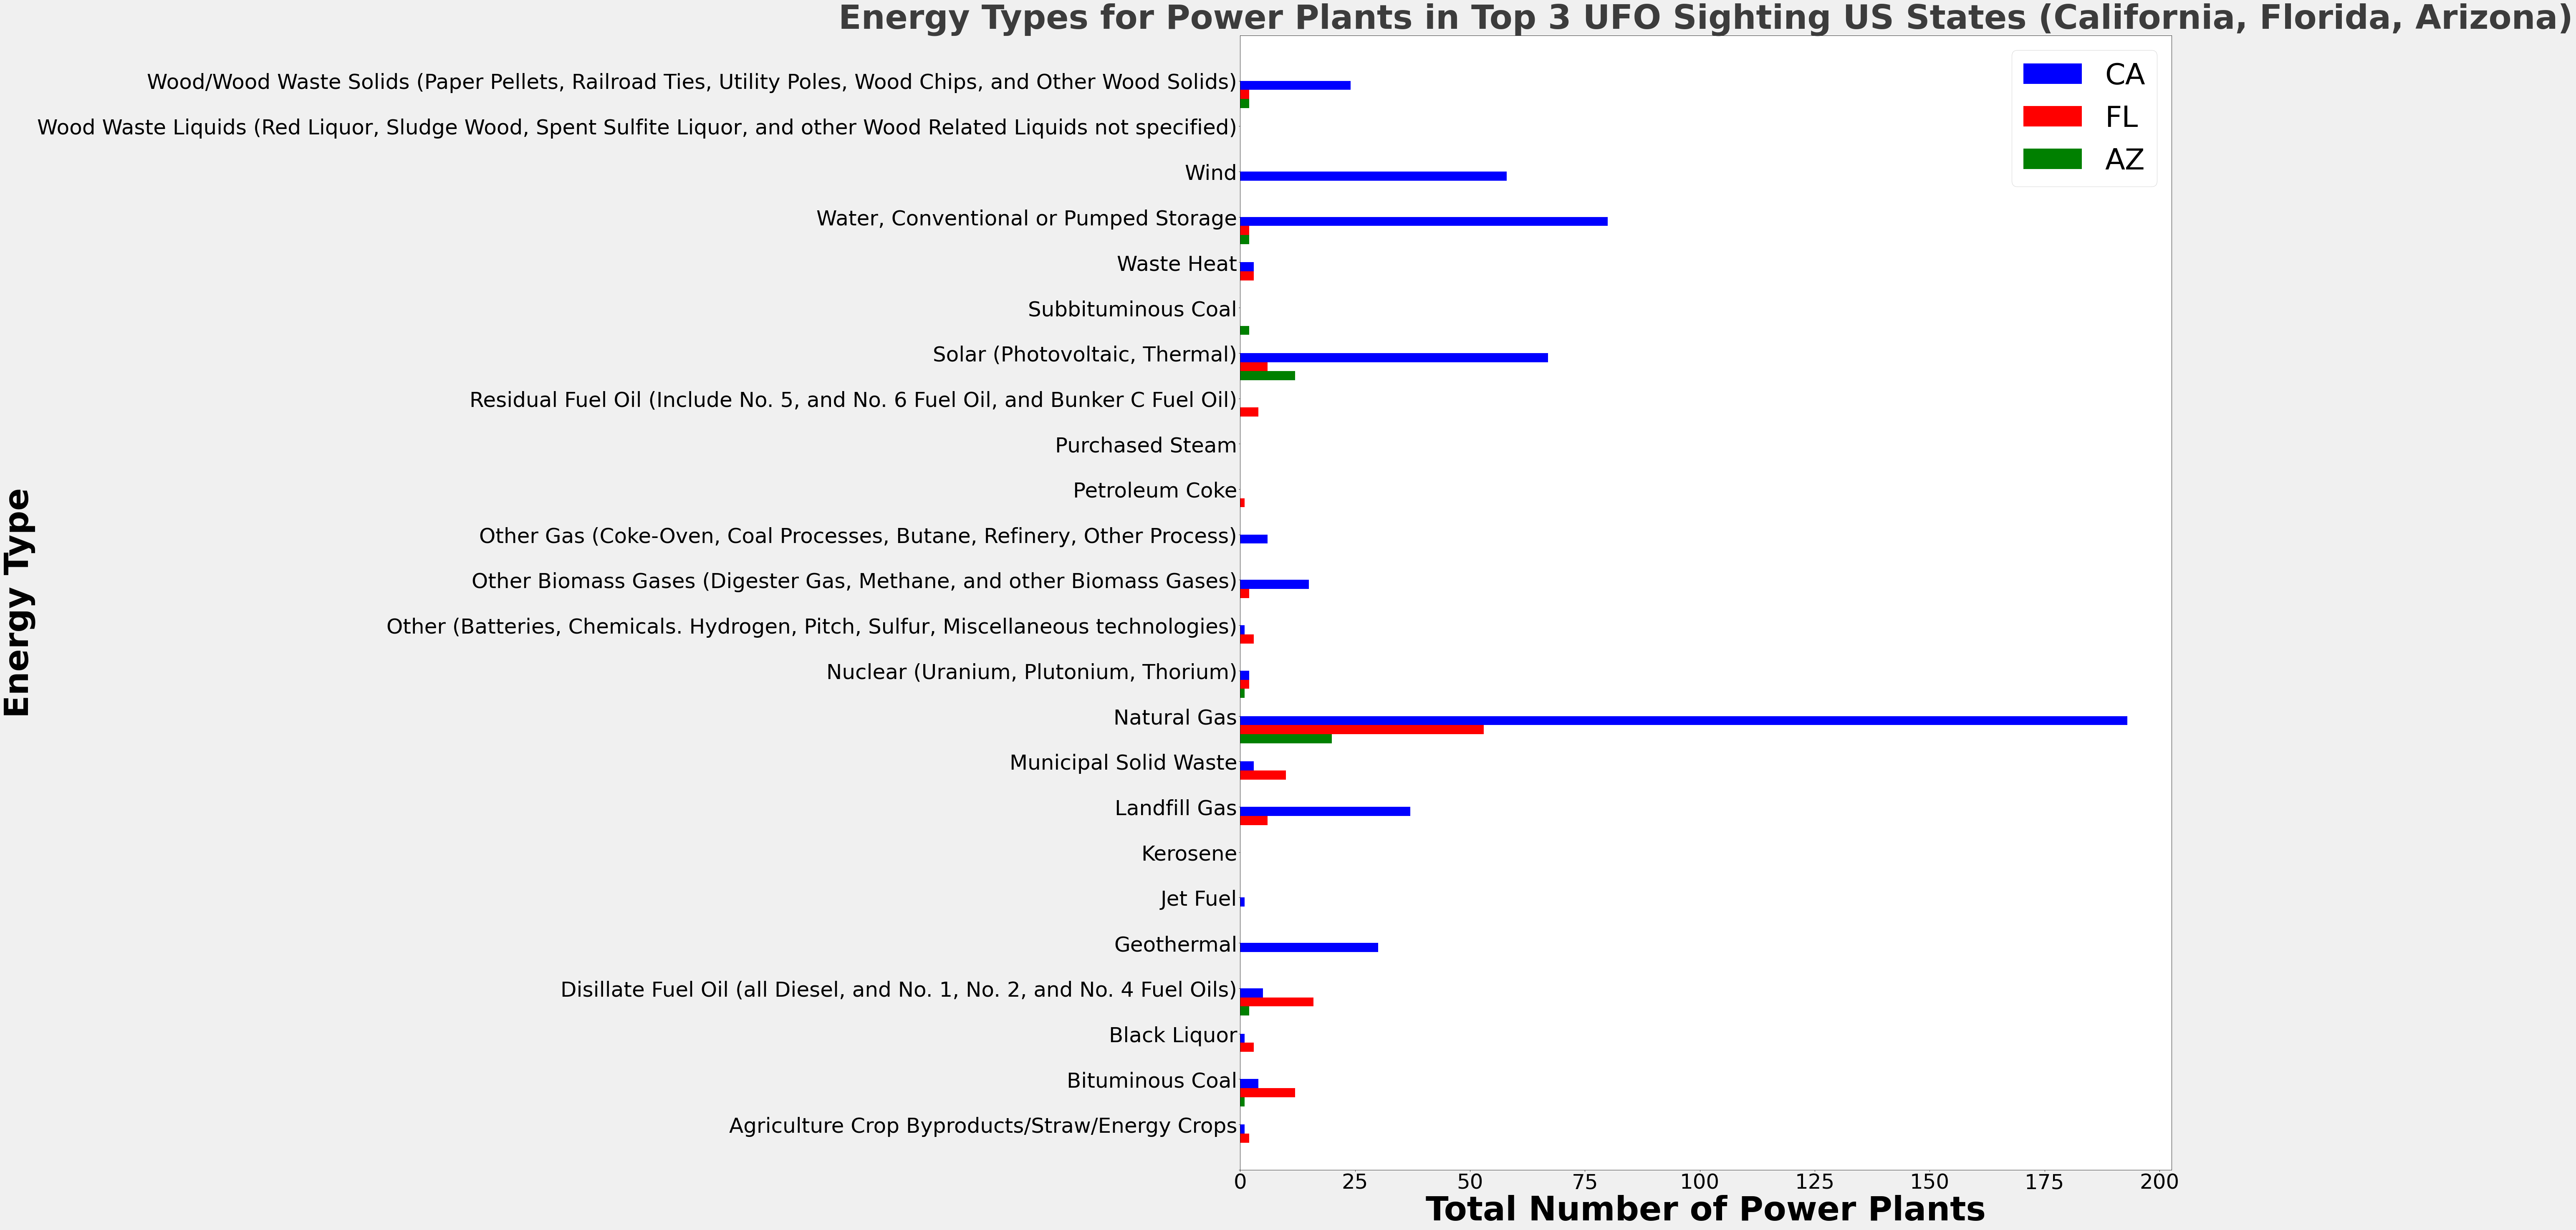

In [ ]:
#graphing energy sources 

fig, ax = plt.subplots(figsize =(40,50))
fig.set_facecolor('#F0F0F0')
width = .2 

power_ca['CA'].sort_index().plot(kind='barh', position=1, color='blue',label="CA", width = width)
power_ca['FL'].sort_index().plot(kind='barh', position=2, color='red',label="FL", width = width)
power_ca['AZ'].sort_index().plot(kind='barh', position=3, color='green',label="AZ", width = width)

plt.ylim(0,25)
ax.set_xlabel('Total Number of Power Plants', fontweight='bold', fontsize=80,)
ax.set_ylabel('Energy Type', fontweight='bold', fontsize=80)
ax.tick_params(axis='both', colors='black', labelsize='50')
plt.title("Energy Types for Power Plants in Top 3 UFO Sighting US States (California, Florida, Arizona)", fontsize=80, fontweight='bold', color='#3C3C3C')
plt.legend(fontsize=70)
plt.show()

In [ ]:
# Making visual of value counts of the states columns against each dataset

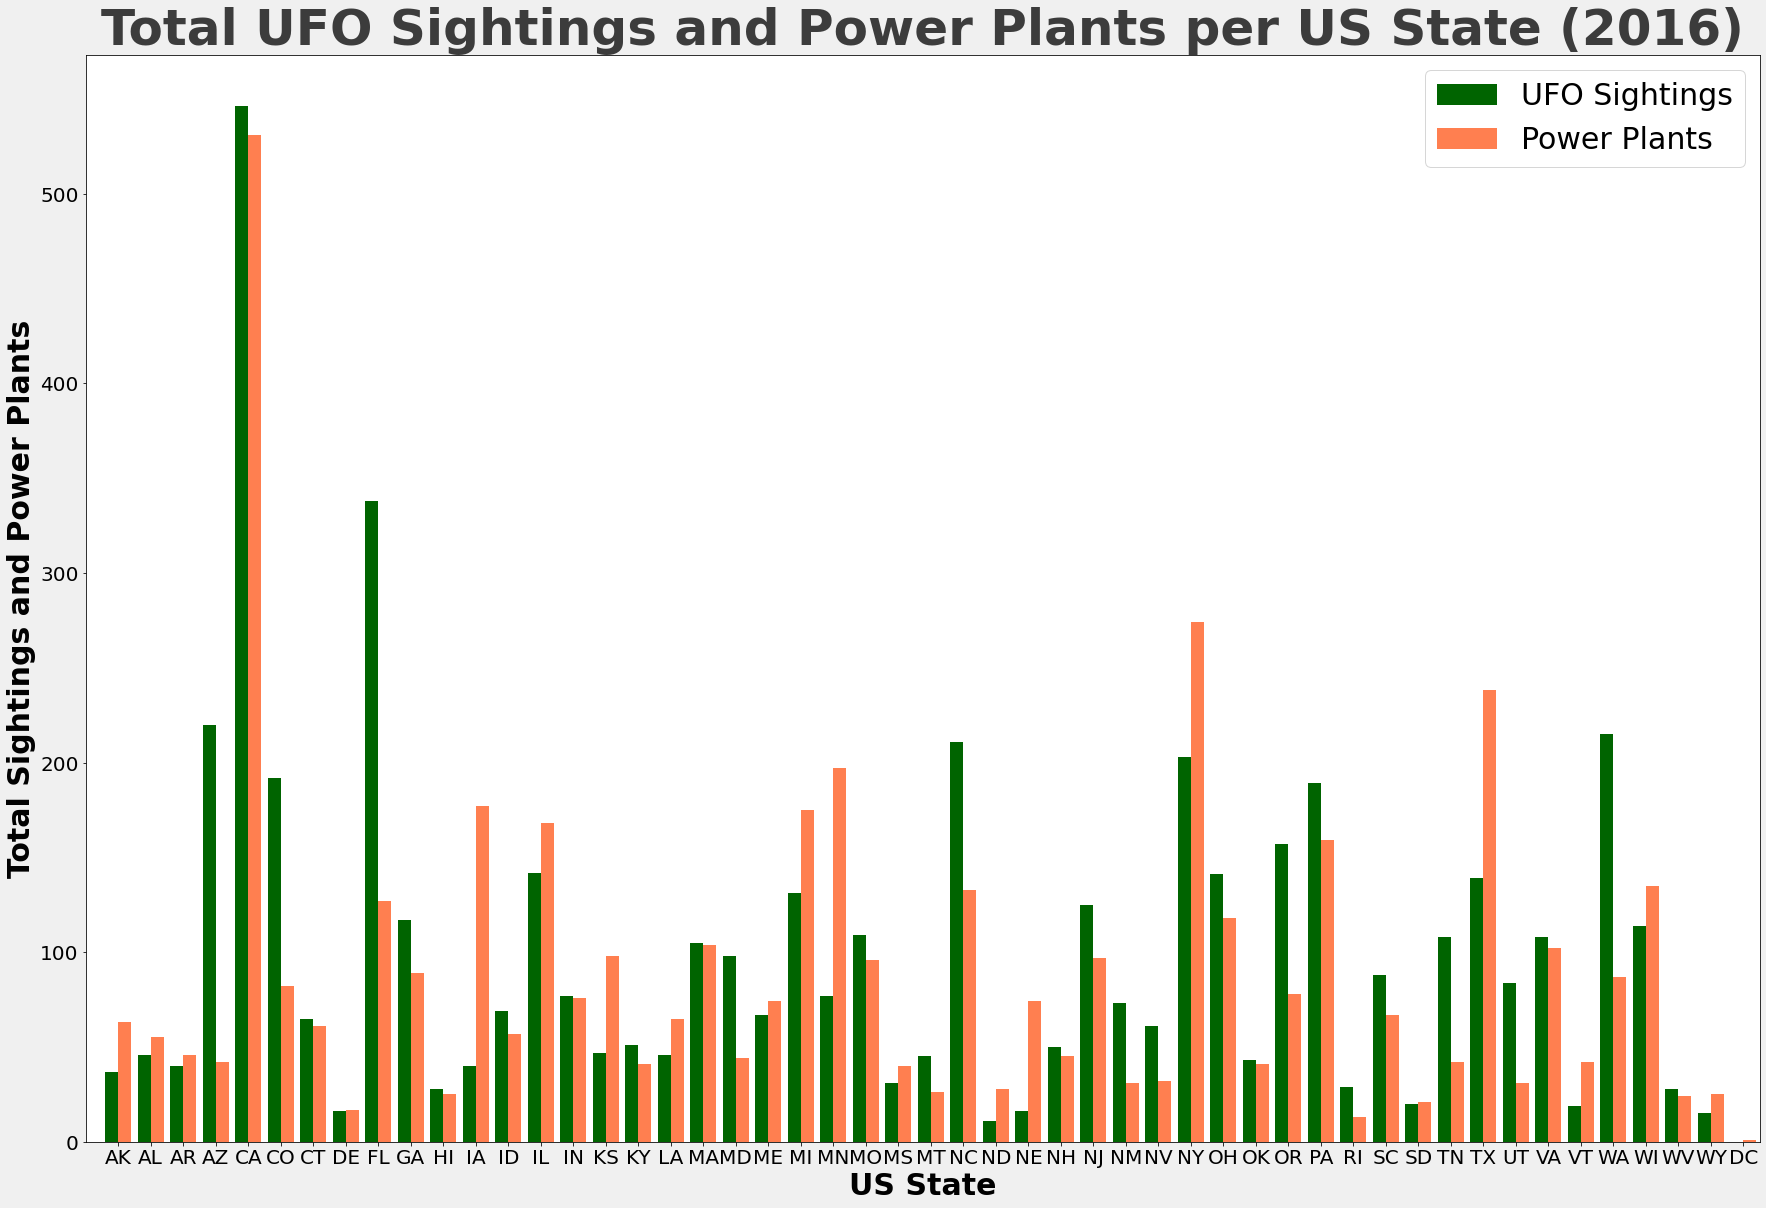

In [ ]:
# first graph of UFO and power plant totals per state
fig, ax = plt.subplots(figsize =(30,20))

fig.set_facecolor('#F0F0F0')
width = .35 

UFOs = ufo2['State']
Power_Plants = power_p['STATE_CODE']

items1, counts1 = zip(*sorted(Counter(UFOs).items()))
items2, counts2 = zip(*sorted(Counter(Power_Plants).items()))

plt.plot(items1+items2, [5]*len(items1+items2), visible=False)

trans1 = matplotlib.transforms.Affine2D().translate(-0.2,0)
trans2 = matplotlib.transforms.Affine2D().translate(+0.2,0)

plt.bar(items1, counts1, label="UFO Sightings", width=0.4, color='darkgreen', transform=trans1+plt.gca().transData)
plt.bar(items2, counts2, label="Power Plants", width=0.4, color='coral', transform=trans2+plt.gca().transData)
plt.xlim(-1,50.5)
plt.legend(fontsize=30,)
ax.set_xlabel('US State', fontweight='bold', fontsize=30)
ax.set_ylabel('Total Sightings and Power Plants', fontweight='bold', fontsize=30)
ax.tick_params(axis='both', colors='black', labelsize='20')
plt.title("Total UFO Sightings and Power Plants per US State (2016)", fontsize=50, fontweight='bold', color='#3C3C3C')
plt.show()

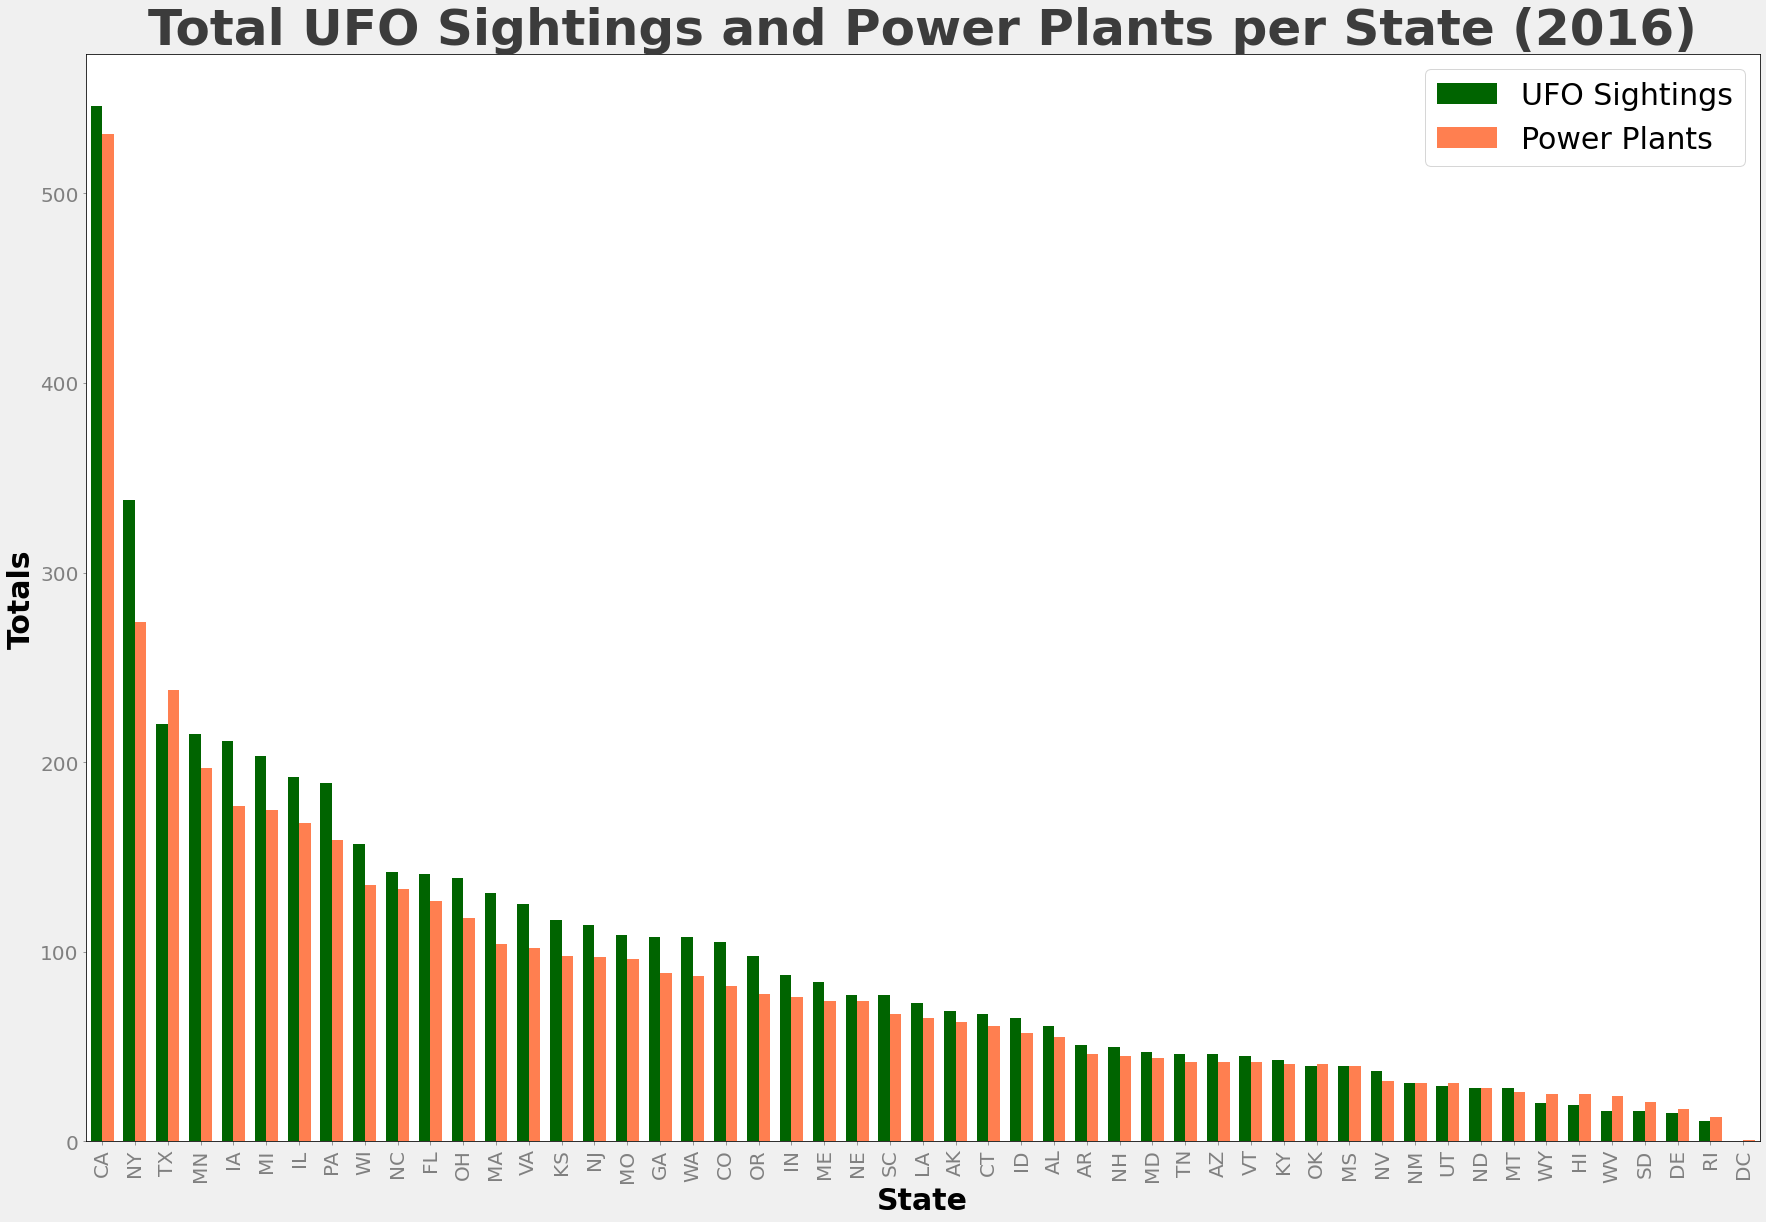

In [ ]:
#second variation of graph sorted highest to lowest
fig, ax = plt.subplots(figsize =(30,20))
fig.set_facecolor('#F0F0F0')
width = .35 

ufo2['State'].value_counts().plot(kind='bar', position=1, color='darkgreen',label="UFO Sightings", width = width)
power_p['STATE_CODE'].value_counts().plot(kind='bar', color='coral', label="Power Plants", position=0, width = width)
plt.xlim(-.5,50.5)
plt.legend(fontsize=30,)
ax.set_xlabel('State', fontweight='bold', fontsize=30)
ax.set_ylabel('Totals', fontweight='bold', fontsize=30)
ax.tick_params(axis='both', colors='grey', labelsize='20')
plt.title("Total UFO Sightings and Power Plants per State (2016)", fontsize=50, fontweight='bold', color='#3C3C3C')

plt.show()

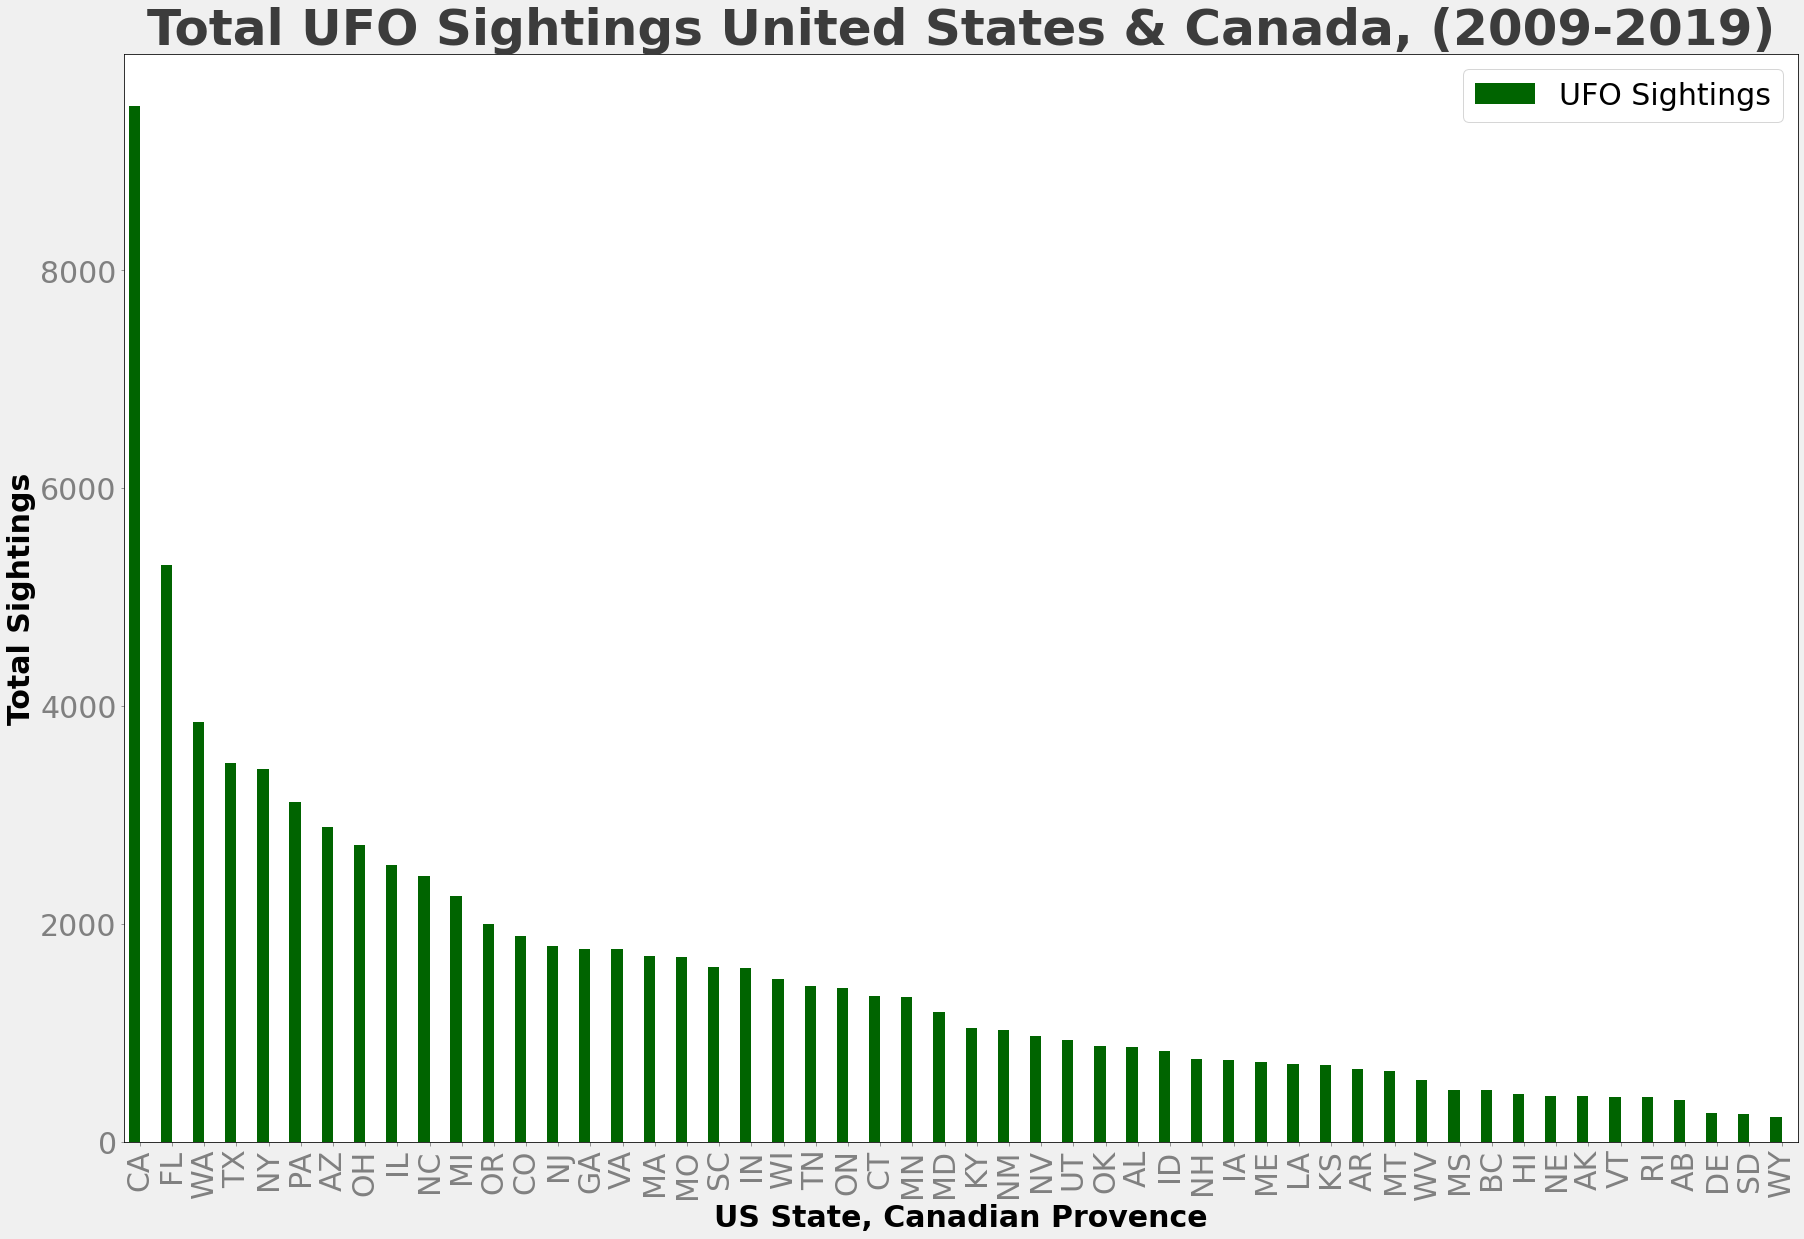

In [ ]:
# graph of total UFO observations
fig, ax = plt.subplots(figsize =(30,20))
fig.set_facecolor('#F0F0F0')
width = .35 

ufo['state'].value_counts().plot(kind='bar', position=1, color='darkgreen',label="UFO Sightings", width = width)
plt.xlim(-.5,51.5)
plt.legend(fontsize=30,)
ax.set_xlabel('US State, Canadian Provence', fontweight='bold', fontsize=30,)
ax.set_ylabel('Total Sightings', fontweight='bold', fontsize=30)
ax.tick_params(axis='both', colors='grey', labelsize='30')
plt.title("Total UFO Sightings United States & Canada, (2009-2019)", fontsize=50, fontweight='bold', color='#3C3C3C')

plt.show()

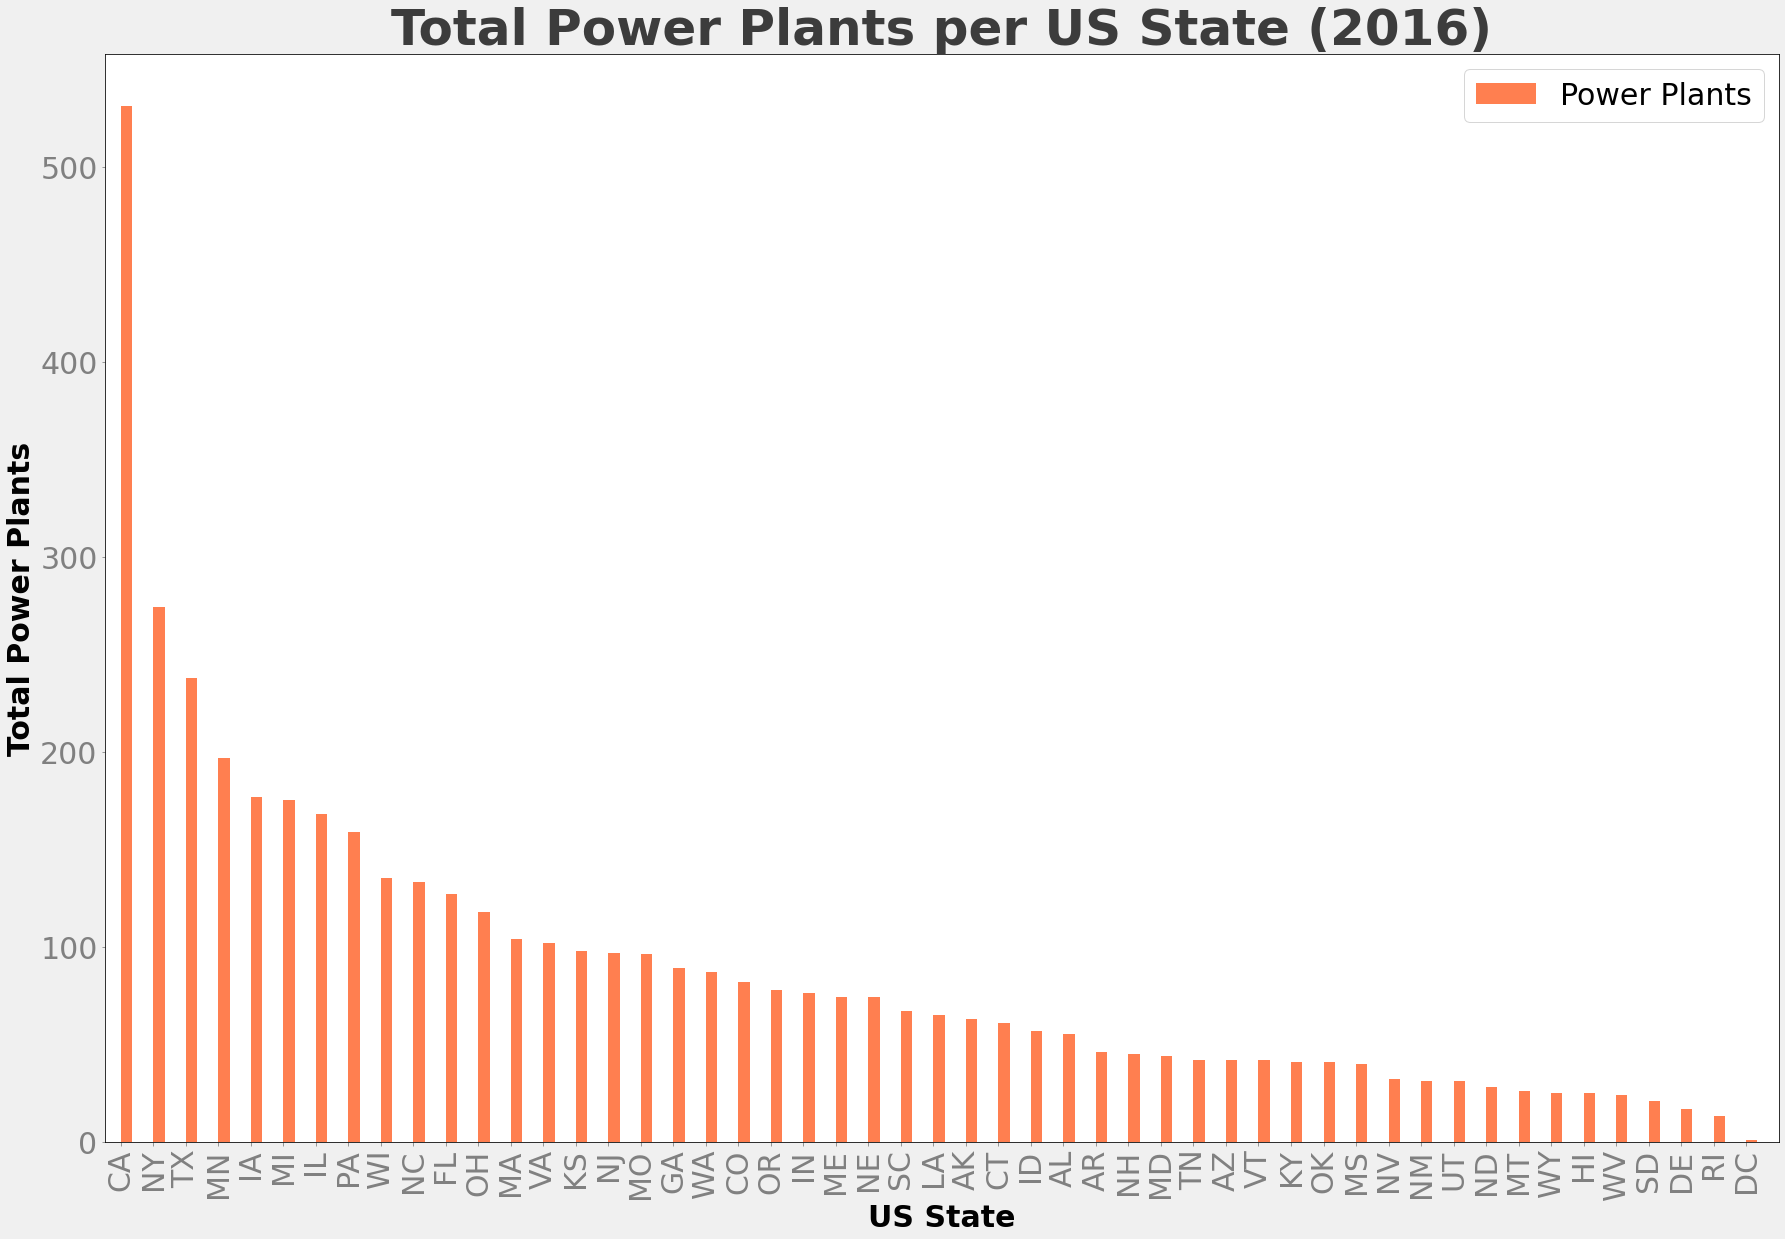

In [ ]:
# Graph of power plant data

fig, ax = plt.subplots(figsize =(30,20))
fig.set_facecolor('#F0F0F0')
width = .35 

power_p['STATE_CODE'].value_counts().plot(kind='bar', color='coral', label="Power Plants", position=0, width = width)
plt.xlim(-.50,51)
plt.legend(fontsize=30,)
ax.set_xlabel('US State', fontweight='bold', fontsize=30,)
ax.set_ylabel('Total Power Plants', fontweight='bold', fontsize=30)
ax.tick_params(axis='both', colors='grey', labelsize='30')
plt.title("Total Power Plants per US State (2016)", fontsize=50, fontweight='bold', color='#3C3C3C')
plt.show()

In [ ]:
#creating geographic maps with geopandas

import geopandas as gpd
from geopandas import GeoDataFrame

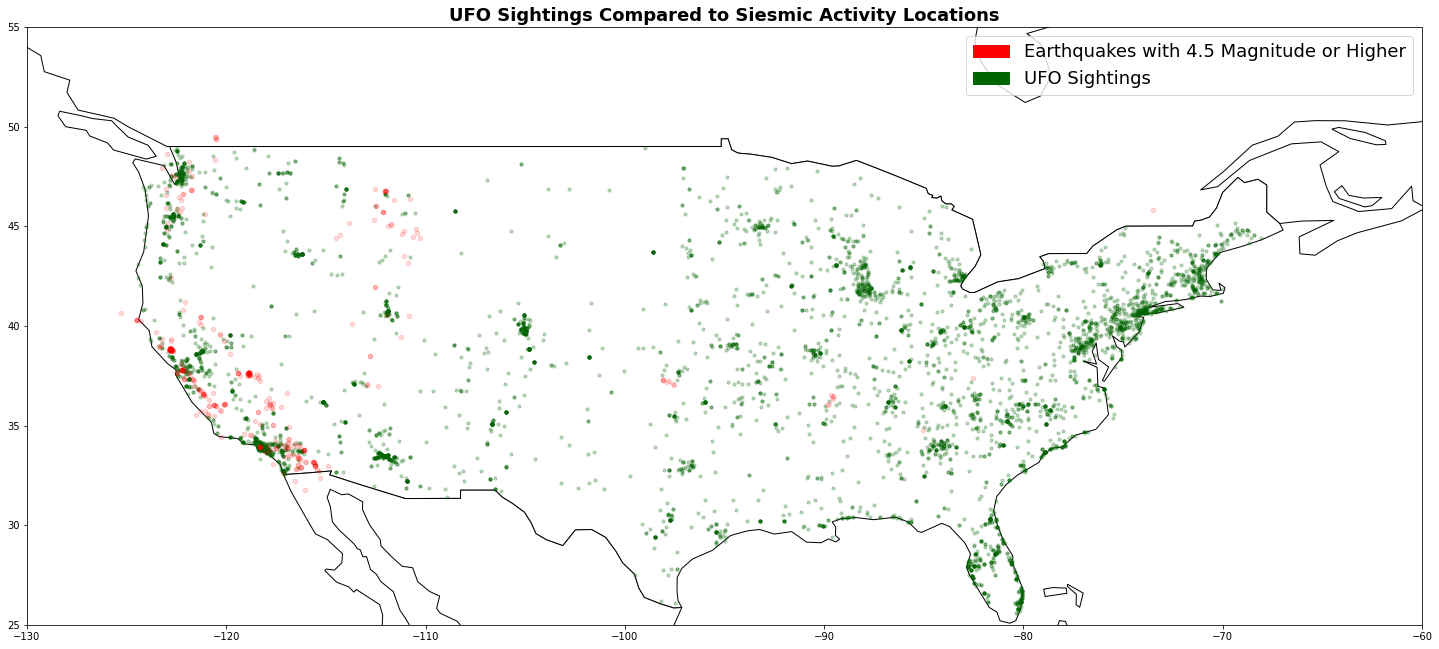

In [ ]:
# Mapping coordinate data for UFOs and Earthquake data using baseline Geopandas library files
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'North America'].plot(
    color='white', figsize=(25,25),edgecolor='black')
fig.set_facecolor('#F0F0F0')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   

gdf.plot(ax=ax, color='darkgreen', label="UFO Sightings", markersize = 10, alpha = .25)
gdf2.plot(ax=ax, color='red', label="Earthquakes with 4.5 Magnitude or Higher", markersize = 20, alpha=.15);

ax.set_title("UFO Sightings Compared to Siesmic Activity Locations", fontsize=18, fontweight='bold')

red_patch = mpatches.Patch(color='red', label='Earthquakes with 4.5 Magnitude or Higher')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')

plt.legend(handles=[red_patch, green_patch], fontsize=18)
plt.xlim(-130,-60)
plt.ylim(25,55)
plt.show()

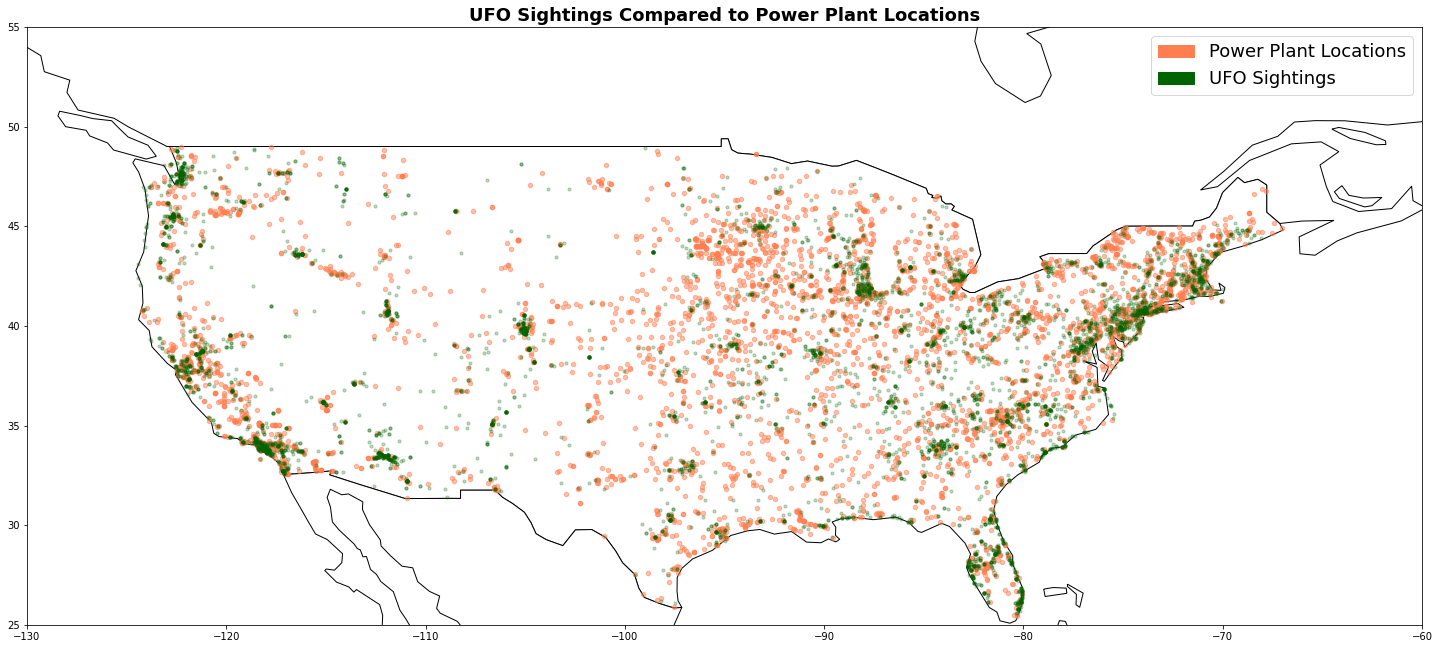

In [ ]:
# creating second map of UFO and powerplant data using standard Geopandas library
ax = world[world.continent == 'North America'].plot(
    color='white', figsize=(25,25),edgecolor='black')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   

gdf3.plot(ax=ax, color='coral', label="Power Plant Locations", markersize = 20, alpha=.5)
gdf.plot(ax=ax, color='darkgreen', label="UFO Sightings", markersize = 10, alpha = .25)

ax.set_title("UFO Sightings Compared to Power Plant Locations", fontsize=18, fontweight='bold')
coral_patch = mpatches.Patch(color='coral', label='Power Plant Locations')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')
plt.legend(handles=[coral_patch,green_patch], fontsize=18)
plt.xlim(-130,-60)
plt.ylim(25,55)
plt.show()

In [ ]:
# Loading map dataset in order to create more detailed US map
# https://eric.clst.org/tech/usgeojson/ - website used to get the mapping data
country = geopandas.read_file('https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json')
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [ ]:
# Created 2 functions to clean coordinates to fall within the bounding box
#longitude function-clears values that fall outside of the USA bounding box coordinates
def lng_clean1(lng):
  while -66.883 >= lng or lng >= -124.84:
    return lng
  else:
      return np.NaN

In [ ]:
#latitude function- drops latitude values that fall outside of the US bounding box
def lat_clean1(lat):
  while 49.38 >= lat or lat >= 24.39:
    return lat
  else:
      return np.NaN

In [ ]:
# applying the cleaned data to the dataframe to use for the graphing
ufo3 = ufo2['lng'].apply(lng_clean1)
ufo3

In [ ]:
#updating latitude with function.
ufo4 = ufo2['lat'].apply(lat_clean1)
ufo4

In [ ]:
#updating original data with changes
ufo2['lng'] = ufo3

In [ ]:
#updating original data 
ufo2['lat'] = ufo4

In [ ]:
#dropping NA values so data will plot correctly.
ufo3=ufo3.dropna()

In [ ]:
#dropping non applicable coordinates from the data
ufo4=ufo4.dropna()

In [ ]:
#creating map of earthquake data vs UFO sightings

fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax,edgecolor='black', color='grey')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   


gdf.plot(ax=base, color='darkgreen', label="UFO Sightings",  marker='^', markersize = 30, alpha = .25)
gdf2.plot(ax=base, color='red', label="Earthquakes with 4.5 Magnitude or Higher", markersize = 30, alpha=.15);
plt.xlim(-130,-60)
plt.ylim(25,55)

ax.set_title("UFO Sightings Compared to Seismic Activity Locations, United States (2016)", fontsize=50, fontweight='bold')

red_patch = mpatches.Patch(color='red', label='Earthquakes with 4.5 Magnitude or Higher')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')

plt.legend(handles=[red_patch, green_patch], fontsize=30)

plt.show()


In [ ]:
#creating a map of Hawaii

fig, ax = plt.subplots(1, figsize=(5,5))
base = country[country['NAME'].isin(['Alaska']) == False].plot(ax=ax,edgecolor='black', color='grey')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   


gdf.plot(ax=base, color='darkgreen', label="UFO Sightings",  marker='^', markersize = 30, alpha = 1)
gdf2.plot(ax=base, color='red', label="Earthquakes with 4.5 Magnitude or Higher", markersize = 30, alpha=1);
plt.xlim(-165,-153)
plt.ylim(15,25)
plt.title("Hawaii", fontsize=20)

red_patch = mpatches.Patch(color='red', label='Earthquakes with 4.5 Magnitude or Higher')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')

plt.show()


In [ ]:
# creating a map of alaska
fig, ax = plt.subplots(1, figsize=(10,10))
base = country[country['NAME'].isin(['Hawaii']) == False].plot(ax=ax,edgecolor='black', color='grey')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   


gdf.plot(ax=base, color='darkgreen', label="UFO Sightings",  marker='^', markersize = 30, alpha = 1)
gdf2.plot(ax=base, color='red', label="Earthquakes with 4.5 Magnitude or Higher", markersize = 30, alpha=1);
plt.xlim(-179,-125)
plt.ylim(51.21,71.0)
plt.title("Alaska", fontsize=20)

red_patch = mpatches.Patch(color='red', label='Earthquakes with 4.5 Magnitude or Higher')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')

plt.show()

In [ ]:
# creating a map of power plants vs UFO sightings

fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, edgecolor='black', color='grey')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   


gdf3.plot(ax=ax, color='coral', label="Power Plant Locations", markersize = 20, alpha=.3)
gdf.plot(ax=ax, color='darkgreen', label="UFO Sightings", marker='^', markersize = 30, alpha = .25)
plt.xlim(-130,-60)
plt.ylim(25,55)

ax.set_title("UFO Sightings Compared to Power Plant Locations, United States (2016)", fontsize=50, fontweight='bold')
coral_patch = mpatches.Patch(color='coral', label='Power Plant Locations')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')
plt.legend(handles=[coral_patch,green_patch], fontsize=18)



plt.show()

In [ ]:
# Hawaii

fig, ax = plt.subplots(1, figsize=(5,5))
base = country[country['NAME'].isin(['Alaska']) == False].plot(ax=ax,edgecolor='black', color='grey')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   


gdf.plot(ax=base, color='darkgreen', label="UFO Sightings",  marker='^', markersize = 30, alpha = 1)
gdf3.plot(ax=ax, color='coral', label="Power Plant Locations", markersize = 20, alpha=.3);
plt.xlim(-165,-153)
plt.ylim(15,25)
plt.title("Hawaii", fontsize=20)
coral_patch = mpatches.Patch(color='coral', label='Power Plant Locations')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')


plt.show()

In [ ]:
# Alaska

fig, ax = plt.subplots(1, figsize=(10,10))
base = country[country['NAME'].isin(['Hawaii']) == False].plot(ax=ax,edgecolor='black', color='grey')

geometry = [Point(xy) for xy in zip(ufo2['lng'], ufo2['lat'])]
gdf = GeoDataFrame(ufo2, geometry=geometry)  

geometry2 = [Point(xy) for xy in zip(quake['longitude'], quake['latitude'])]
gdf2 = GeoDataFrame(quake, geometry=geometry2) 

geometry3 = [Point(xy) for xy in zip(power_p['X'], power_p['Y'])]
gdf3 = GeoDataFrame(power_p, geometry=geometry3)   


gdf.plot(ax=base, color='darkgreen', label="UFO Sightings",  marker='^', markersize = 30, alpha = 1)
gdf3.plot(ax=ax, color='coral', label="Power Plant Locations", markersize = 20, alpha=.3);
plt.xlim(-179,-125)
plt.ylim(51.21,71.0)
plt.title("Alaska", fontsize=20)

red_patch = mpatches.Patch(color='red', label='Earthquakes with 4.5 Magnitude or Higher')
green_patch = mpatches.Patch(color='darkgreen', label='UFO Sightings')

plt.show()

In [ ]:
# Statistics testing for the sets of data.
# first checking the means
ufo2['State'].value_counts().mean()

In [ ]:
# checking the total size of the data for ufos and power plants. 
ufo2.shape

In [ ]:
# using total size of dataset to determine my sample sizes to use
power_p.shape

In [ ]:
#based on sample size, creating a random sample of 4000 for each type of data

ufo_sample = ufo2.sample(4000, random_state = 42)

In [ ]:
# power plant sample
power_sample = power_p.sample(4000, random_state = 42)

In [ ]:
#determining the same for earthquake data
quake.shape

In [ ]:
# running t-test for state totals of power plants and sightings

stats.ttest_ind(ufo_sample['State'].value_counts(), power_sample['STATE_CODE'].value_counts(), nan_policy='omit')

In [ ]:
#t-testing for coordinate data UFO-power plant (latitude )
stats.ttest_ind(ufo_sample['lat'], power_sample['Y'], nan_policy='omit')

In [ ]:
#t-testing corrdinates for ufo-power plant (longitude)
stats.ttest_ind(ufo_sample['lng'], power_sample['X'], nan_policy='omit')

In [ ]:
#creating smaller random sample for quake data
quake_sample = quake.sample(400, random_state=42)

In [ ]:
ufo_samp2 = ufo2.sample(400, random_state=42)

In [ ]:
#running t-test for quake coordinates (latitude).
stats.ttest_ind(ufo_samp2['lat'], quake_sample['latitude'], nan_policy='omit')

In [ ]:
#running t-test for quake coordinates (longitude)
stats.ttest_ind(ufo_samp2['lng'], quake_sample['longitude'], nan_policy='omit')